# Convex hull 
## (Envolvente Convexa)

# Librerías

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Problematica
Dado un conjunto de puntos diferentes, finitos, mayores e iguales 3, no colineales. Encontrar su envolvente convexa. Mediante el algoritmo de graham podemos encontrar la envolvente convexa de un conjunto P de puntos.

### Escoger el P0

In [13]:
def point_min(X,Y,P):
    #Parte uno encontrar el minimo en X-coordenada

    Xmin = X[0] #Tomo el primer valor de los puntos para ir comparando en el for
    Ymin = Y[0] # Inicializo ymin en el primer valor de la lista
    # 1. Tomar el que tiene la coordenada Xmin para el P0
    for i in range(len(P)):
        if Xmin > X[i]:
            Xmin = X[i]
            Ymin = P[i][1]
        elif Xmin == X[i]:
            if Ymin > Y[i]:
                Xmin = Xmin
                Ymin = P[i][1]
    # Tenemos el punto de partida
    P0 = [Xmin,Ymin]
    return P0

### Función angulo 1
Para encotrar el angulo recordemos que el angulo se halla entre el punto p0 a el punto pn y con respecto a la horinzontal.
$$\theta = arctan(\frac{(ph-p0)\times(pn-p0)}{(ph-p0)*(pn-p0)})$$

In [14]:
#angulo del pn con p0 y la horizontal
def ang(x0,y0,xh,yh,xn,yn):
    cruz = ((xh-x0)*(yn-y0))-((xn-x0)*(yh-y0))
    div = ((xh-x0)*(xn-x0))+((yh-y0)*(yn-y0))
    theta = np.arctan2(cruz,div)
    return theta

### Función angulo 2
Para esta función calculamos la pendiente entre los puntos P0 y Pn, luego sacamos el arcotangente para encontrar el angúlo $\theta$
$$ \theta = arctan(\frac{yn-y0}{xn-x0}) $$

In [15]:
#Angulo con la pendiente
def ang2(x0,y0,xn,yn):
    m1 = yn-y0
    m2 = xn-x0
    theta = np.arctan2(m1,m2)
    return(theta)

## Distancia entre dos puntos

In [16]:
def dist(x0,y0,x1,y1):
    di = np.sqrt((x1-x0)^2 + (y1-y0)^2)
    return di 

## Ordenar la lista por los angulos

In [17]:
def angles_sort(P0,P_new):
    a = [] #Lista de punto con su respectivo angulo
    angles=[] #lista de angulos
    for n in P_new:
        #m = ang(P0[0],P0[1],P0[0]+1,P0[1],n[0],n[1])
        m = ang2(P0[0],P0[1],n[0],n[1])
        if m is angles:
            # Revisar que si tienen el mismo angulo escoger el de la mayor distancia
            index = angles.index(m)
            p_prev = P_new[index]
            d1 = dist(P0[0],P0[1],n[0],n[1])
            d2 = dist(P0[0],P0[1],p_prev[0],p_prev[1])
            if d1 > d2:
                a[index]=[n[0],n[1],m]
        else:
            a.append([n[0],n[1],m])
            angles.append(m)


    # 3.Debemos ordenar con respecto al angulo la lista
    angulo = lambda a:a[2]
    a.sort(key=angulo) #Organizado
    #print(a)
    #Vamos a revisar si encontramos dos puntos con la misma pendiente para tomar el que tenga 
    # la distancia más larga.
    # 4. Agrupo los puntos en una pila con el orden anterior
    p_sort_pila = []
    for k in a:
        p_sort_pila.append([k[0],k[1]])
    return p_sort_pila

## Punto cruz


In [18]:
def Producto_Cruz(P0,P1,P2):
    d = ((P1[0]-P0[0])*(P2[1]-P0[1]))-((P2[0]-P0[0])*(P1[1]-P0[1]))
    return d

## Graficar puntos

In [19]:
def grafic_hull(S,P0,x,y,N):
    xcor = []
    ycor = []
    for n in range (len(S)):
        xcor.append(S[n][0])
        ycor.append(S[n][1])
    
    plt.scatter(x,y)
    plt.plot(P0[0],P0[1], "ro")
    for n in range(N):
        num = "P"+str(n)
        #print(num)
        plt.annotate(num , xy = (S[n][0], S[n][1]), xytext=(S[n][0], S[n][1]))
    plt.plot(xcor,ycor)
    plt.show()

# Algoritmo Graham

In [61]:
# Entra un arreglo de arreglos con los valores de los puntos en X y Y
def Algoritmo_Graham(P):
    X = []
    Y = []
    #Separaremos los puntos de P en X y Y
    for n in range(len(P)):
        X.append(P[n][0])
        Y.append(P[n][1])
    # 1. Encontrar punto minimo en X-coordenada
    P0 = point_min(X,Y,P)
    #print("Punto de partida:",P0)

    #Quitamos el P0 de P creando así P nuevo
    P_new =[]
    for i in range(len(P)):
        if np.all(P[i] != P0):
            P_new.append(P[i])

    #print(P_new)

    #2. Calculo las pendientes de P0 -> Pi 
    p_sort_pila = angles_sort(P0,P_new)
    #print(p_sort_pila)
    #5. Definimos el arreglo S que es el conjunto con los vertices del poligono
    S = []
    #6. Agegamos P0, P1, y P2 en la pila 
    S.append(P0)
    S.append(p_sort_pila[0])
    S.append(p_sort_pila[1])
    #print(S)
    #print(p_sort_pila)
    #8. Reviso que todos vayan para la izquierda desde i = 3
    #g = False #Suponiendo que da vuelta a la izquierda
    for i in range(2,len(p_sort_pila)):
        #grafic_hull(S,P0,X,Y,len(S))
        S.append(p_sort_pila[i])
        d = Producto_Cruz(S[-3],S[-2],S[-1])
        while(d <= 0):
            S.pop(-2) #Elimino el penultimo de S 
            d = Producto_Cruz(S[-3],S[-2],S[-1])
    #Por ultimo agregamos P0 otra vez   
    S.append(P0)
    #print(S)
    grafic_hull(S,P0,X,Y,len(S))




    

In [62]:
P = np.round(np.random.rand(20,2),4)
#P = [[1,1],[1,3], [1,6], [2,1], [2,2],[2,4],[3,3],[3,6],[2,6],[4,6],[3,5],[4,4]]
#print(P)
#print(P[1][0])
#print(len(P))


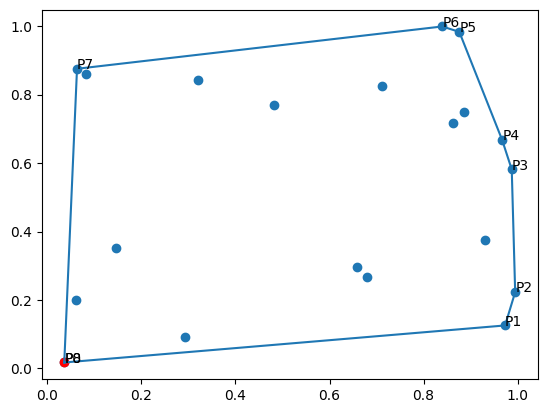

In [63]:
Algoritmo_Graham(P)